### Load in the DataFrame


The data is stored in **profiles.csv**. We can start to work with it in **dating.py** by using Pandas, which we have imported for you with the line:


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Create your df here:
data = pd.read_csv('profiles.csv')

The dataset provided has the following columns of multiple-choice data:

- body_type
- diet
- drinks
- drugs
- education
- ethnicity
- height
- income
- job
- offspring
- orientation
- pets
- religion
- sex
- sign
- smokes
- speaks
- status

And a set of open short-answer responses to :

- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…

### Explore the Data


Let's make sure we understand what these columns represent!

Pick some columns and call `.head()` on them to see the first five rows of data. For example, we were curious about `job`, so we called:

In [2]:
#data.info
#data.body_type.value_counts()
#data.describe()
#data.dtypes

### Visualize some of the Data


We can start to build graphs from the data:


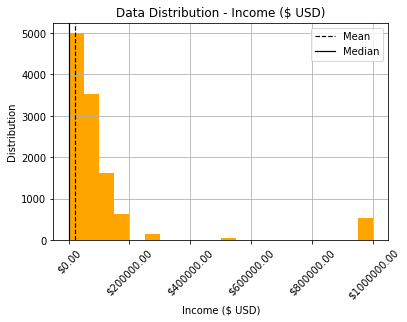

In [3]:
import matplotlib.ticker as ticker

mean_income = np.mean(data.income)



ax = plt.subplot()
plt.hist(data.income, bins = 20, range=(0, 1000000), color = 'orange')
plt.grid()
plt.xlabel('Income ($ USD)')
plt.ylabel('Distribution')
plt.title('Data Distribution - Income ($ USD)')
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.xaxis.set_major_formatter(formatter)
plt.xticks(rotation = 45)
plt.axvline(data.income.mean(), color='k', linestyle='dashed', linewidth=1.2, label = 'Mean')
plt.axvline(data.income.median(), color='k', linewidth=1.2, label = 'Median')
plt.legend()

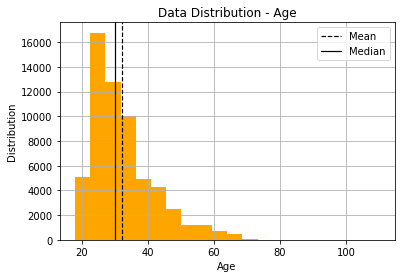

In [4]:
plt.hist(data.age, bins = 20, color = 'orange')
plt.grid()
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Data Distribution - Age')
plt.axvline(data.age.mean(), color='k', linestyle='dashed', linewidth=1.2, label = 'Mean')
plt.axvline(data.age.median(), color='k', linewidth=1.2, label = 'Median')
plt.legend()

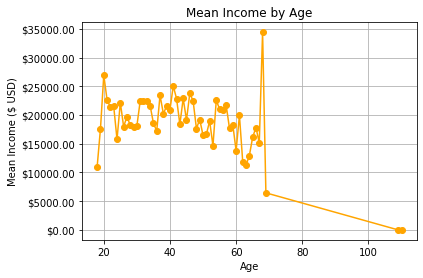

In [5]:
income_by_age = data.groupby('age').income.mean()


ax = plt.subplot()
plt.plot(income_by_age, marker = 'o', color = 'orange')
plt.grid()
plt.xlabel('Age')
plt.ylabel('Mean Income ($ USD)')
plt.title('Mean Income by Age')
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)


### Formulate a Question



- body_type
- diet
- drinks
- drugs
- education
- ethnicity
- height
- income
- job
- offspring
- orientation
- pets
- religion
- sex
- sign
- smokes
- speaks
- status

In [6]:
#Check Value Counts

#data.income.value_counts()
#data.ethnicity.value_counts()
#data.age.value_counts()
#data.sex.value_counts()

In [7]:
data.dtypes

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object

### Augment your Data


In order to answer the question you've formulated, you will probably need to create some new columns in the DataFrame. This is especially true because so much of our data here is categorical (i.e. `diet` consists of the options `vegan`, `vegetarian`, `anything`, etc. instead of numerical values).


Categorical data is great to use as labels, but we want to create some numerical data as well to use for features.


For our question about Zodiac signs, we wanted to transform the `drinks` column into numerical data.

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#Sex to numerical
data.sex = data.sex.astype('str')

data['sex_num'] = le.fit_transform(data['sex'])
data[['sex', 'sex_num']]

#Ethnicity to numerical
data.ethnicity = data.ethnicity.astype('str')

data['ethnicity_num'] = le.fit_transform(data['ethnicity'])
data[['ethnicity', 'ethnicity_num']]

#data to normalize
data_tonorm = data[['income', 'sex_num', 'ethnicity_num']]
feature_data = data_tonorm.values

#Fix Value Error
data.age = np.nan_to_num(data.income)
feature_data = np.nan_to_num(feature_data)


### Normalize your Data!


In order to get accurate results, we should make sure our numerical data all has the same weight.


In [9]:
from sklearn.preprocessing import MinMaxScaler
x = feature_data
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)







### Use Classification Techniques


We have learned how to perform classification in a few different ways.


- We learned about K-Nearest Neighbors by exploring IMDB ratings of popular movies 
- We learned about Support Vector Machines by exploring baseball statistics
- We learned about Naive Bayes by exploring Amazon Reviews


Some questions we used classification to tackle were:


- Can we predict sex with education level and income??
- Can we predict education level with essay text word counts?


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


train_data, test_data, train_labels, test_labels = train_test_split(x_scaled, data.age, train_size=0.8, test_size=0.2, random_state = 100)

#Remove Value Error
train_data = np.nan_to_num(train_data)
test_data = np.nan_to_num(test_data)
train_labels = np.nan_to_num(train_labels)
test_labels = np.nan_to_num(test_labels)

score = []
for k in range(1, 25):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    score.append(classifier.score(test_data, test_labels))

#Create and Train Classifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(train_data, train_labels)
score_2 = classifier.score(test_data, test_labels)



#Optimal K = 1

#It is possible to accurately predict age with income, sex, and ethnicity

'This model predicts ' + "{:.10%}".format(score_2) + ' of the model correctly.'




'This model predicts 99.8999165972% of the model correctly.'

### Use Regression Techniques


We have learned how to perform Multiple Linear Regression by playing with StreetEasy apartment data. Is there a way we can apply the techniques we learned to this dataset?


Some questions we used regression to tackle were:


- Predict income with length of essays and average word length?
- Predict age with the frequency of "I" or "me" in essays?


We also learned about K-Nearest Neighbors Regression. Which form of regression works better to answer your question?


In [11]:
from sklearn.neighbors import KNeighborsRegressor

score_3 = []
for k in range(1, 25):
    #LOOP
    regressor = KNeighborsRegressor(n_neighbors = k, weights = "distance")
    
    #Fit
    regressor.fit(train_data, train_labels)
    
    #Score
    score_3.append(classifier.score(test_data, test_labels))
    
#Create and Train
regressor = KNeighborsRegressor(n_neighbors = 3, weights = "distance")
regressor.fit(train_data, train_labels)
score_4 = regressor.score(test_data, test_labels)



'This model predicts ' + "{:.10%}".format(score_4) + ' of the model correctly.'




'This model predicts 99.9972337516% of the model correctly.'

### Analyze the Accuracy, Precision and Recall


After you have trained your model and run it, you will probably be curious about how well it did.


Find the accuracy, precision, and recall of each model you used.


In [12]:
#Classifier Metrics
from numpy import random
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

#sample = np.random.normal(test_data.mean(), np.std(test_data), 10000)

guesses = classifier.predict(test_data)

#Accuracy --> The best performance is 1 
print('Classifier accuracy: ' + str(accuracy_score(test_labels, guesses)))
accuracy = accuracy_score(test_labels, guesses)

#Recall --> The best value is 1 and the worst value is 0.
print('Classifier recall: ' + str(recall_score(test_labels, guesses, average = 'weighted')))

#Precision --> The best value is 1 and the worst value is 0.
print('Classifier precision: ' + str(precision_score(test_labels, guesses, average = 'weighted')))

#F1 Score --> F1 score reaches its best value at 1 and worst score at 0. 
print('Classifier F1 score: ' + str(f1_score(test_labels, guesses, average = 'weighted')))


Classifier accuracy: 0.9989991659716431
Classifier recall: 0.9989991659716431
Classifier precision: 0.9990037923127317
Classifier F1 score: 0.9989979800478006


In [13]:
#Regressor Metrics

from sklearn.metrics import r2_score, explained_variance_score

#Regressor
#sample_2 = random.normal(test_data.mean(), np.std(test_data), size = 100000)
guesses_2 = regressor.predict(test_data)

#R2_score --> Best possible score is 1.0
print('r2 score: ' + str(r2_score(test_labels, guesses_2)))

#Explained_Variance_Score --> Best possible score is 1.0, lower values are worse.
print('Explained Variance Score: ' + str(explained_variance_score(test_labels, guesses_2)))

r2 score: 0.9999723375161411
Explained Variance Score: 0.9999723595336379
